## Import Module

In [1]:
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy as scipy_entropy
from scipy.optimize import linear_sum_assignment as linear_assignment
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## 讀取檔案

In [2]:
df = pd.read_csv('banana.csv')
X = df.drop('class', axis=1)
y = df['class']

## 標準化

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

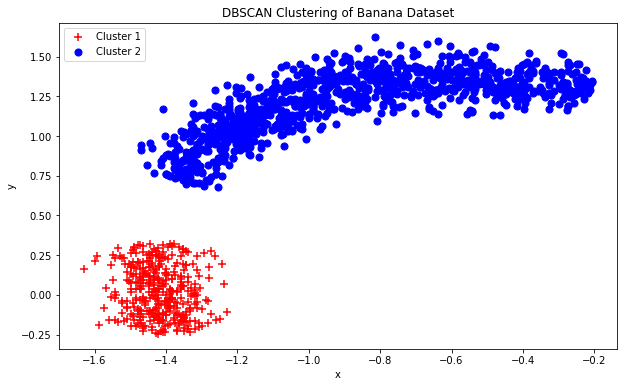

Clustering Elapsed Time: 0.27 s
SSE:  6.4399372384825595
Accuracy:  0.6753273747661609
Mean Entropy:  0.21473703002586864


In [4]:
# 開始計時
start_time = time.time()

#DBSCAN參數
dbscan = DBSCAN(eps=0.06, min_samples=355)
# 執行 DBSCAN 群聚
dbscan_labels = dbscan.fit_predict(df[['x', 'y']])

#散點圖 (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[dbscan_labels == 0, 0], X_scaled[dbscan_labels == 0, 1], s=50, c='red',marker='+', label='Cluster 1')
plt.scatter(X_scaled[dbscan_labels == 1, 0], X_scaled[dbscan_labels == 1, 1], s=50, c='blue',marker='o', label='Cluster 2')
plt.title('DBSCAN Clustering of Banana Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 計算 Accuracy
def calculate_accuracy(true_labels, predicted_labels):
    D = max(predicted_labels.max(), true_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(predicted_labels.size):
        w[predicted_labels[i], true_labels[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in zip(*ind)]) / predicted_labels.size

accuracy = calculate_accuracy(df['class'], dbscan_labels)

# 計算熵
cluster_entropy = [scipy_entropy(df[dbscan_labels == i]['class'].value_counts(normalize=True)) 
                   for i in range(-1, np.max(dbscan_labels)+1)]
mean_entropy = np.mean(cluster_entropy)

# 計算每個群組的中心
cluster_centers = df[dbscan_labels != -1].groupby(dbscan_labels[dbscan_labels != -1]).mean()

# 初始化 SSE
sse = 0

# 計算每個群組內的點到中心的距離平方和
for label in np.unique(dbscan_labels):
    if label != -1:  # 排除噪聲點
        cluster_points = df[dbscan_labels == label]
        center = cluster_centers.loc[label]
        sse += ((cluster_points - center) ** 2).sum().sum()  # 距離平方和

# 停止計時
end_time = time.time()

# 計算所花費的時間
dbscan_elapsed_time = end_time - start_time

# 輸出結果
print("Clustering Elapsed Time: {:.2f} s".format(dbscan_elapsed_time))
print("SSE: ", sse)
print("Accuracy: ", accuracy)
print("Mean Entropy: ", mean_entropy)